In [1]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [2]:
### Load data

File_Names=[['a3_b3_g2.1_e2_0.05_1', 'a3_b3_g2.1_e2_0.05_2', 'a3_b3_g2.1_e2_0.05_3', 'a3_b3_g2.1_e2_0.05_4', 'a3_b3_g2.1_e2_0.05_5'], ['a3_b3_g2.1_e2_0.1_1', 'a3_b3_g2.1_e2_0.1_2', 'a3_b3_g2.1_e2_0.1_3', 'a3_b3_g2.1_e2_0.1_4', 'a3_b3_g2.1_e2_0.1_5'], ['a3_b3_g2.1_e2_0.2_1', 'a3_b3_g2.1_e2_0.2_2', 'a3_b3_g2.1_e2_0.2_3', 'a3_b3_g2.1_e2_0.2_4', 'a3_b3_g2.1_e2_0.2_5'], ['a3_b3_g2.1_e2_0.4_1', 'a3_b3_g2.1_e2_0.4_2', 'a3_b3_g2.1_e2_0.4_3', 'a3_b3_g2.1_e2_0.4_4', 'a3_b3_g2.1_e2_0.4_5'], ['a3_b3_g2.1_e2_0.7_1', 'a3_b3_g2.1_e2_0.7_2', 'a3_b3_g2.1_e2_0.7_3', 'a3_b3_g2.1_e2_0.7_4', 'a3_b3_g2.1_e2_0.7_5'], ['a3_b3_g2.1_e2_1.0_1', 'a3_b3_g2.1_e2_1.0_2', 'a3_b3_g2.1_e2_1.0_3', 'a3_b3_g2.1_e2_1.0_4', 'a3_b3_g2.1_e2_1.0_5']]
g = globals()

# Save number of different parametersets and of simulations per set. All set of params. need to have the same amount of simulations (Here usually 5)!
files = len(File_Names)
files_2 = len(File_Names[0])

for i in range(files):
    for j in range(files_2):
        g[f"data{files_2*i+j+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i][j]}.csv', delimiter=',')

In [3]:
### Split data in two opinions per Dataset, exclude activity
N = len(data1[0])


for i in range(files * files_2):
    for j in range(2):
        g[f"data_{i+1}_op_{j+1}"] = []
        for k in range (N):
            g[f"data_{i+1}_op_{j+1}"].append( g[f"data{i+1}"][2*k + 1 + j] )

### Determine variances and weigh them over 5 iterations

for i in range(files * files_2):
    for j in range(2):
        g[f"var_{i+1}_{j+1}"] = np.var( g[f"data_{i+1}_op_{j+1}"], axis=1)


for i in range(files):
    for j in range(2):
        g[f"var_weigh_{i+1}_{j+1}"] = np.zeros(N)
        for k in range (N):
            for l in range (files_2):
                g[f"var_weigh_{i+1}_{j+1}"][k] += g[f"var_{files_2*i+1+l}_{j+1}"][k]
            g[f"var_weigh_{i+1}_{j+1}"][k] = g[f"var_weigh_{i+1}_{j+1}"][k] / files_2


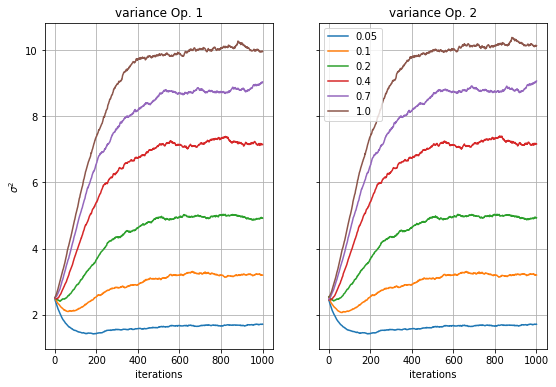

In [4]:
### Create Plot

iterations = np.arange(1,N+1)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9,6))
eps2 = [0.05, 0.1, 0.2, 0.4, 0.7, 1.0]

ax[0].set_title("variance Op. 1")
for i in range (files):
    ax[0].plot(iterations, g[f"var_weigh_{i+1}_1"], label=f"{eps2[i]}")
ax[0].set_xlabel("iterations")
ax[0].set_ylabel(f"$\sigma^2$")
ax[0].grid()
ax[1].set_title("variance Op. 2")
for i in range (files):
    ax[1].plot(iterations, g[f"var_weigh_{i+1}_2"], label=f"{eps2[i]}")
ax[1].set_xlabel("iterations")
ax[1].grid()
ax[1].legend()
plt.show()

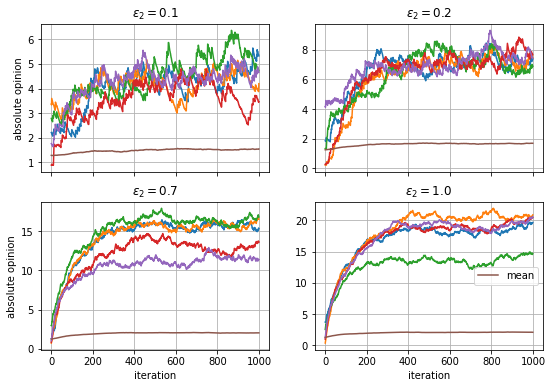

In [5]:
#### Plotting absolute opinions of most active nodes for opinion 1

# Finding 4 most active nodes for 4 datasets

act = []
iterations = np.arange(1,N)
num_act = 5

# Number of datasets to be examined
dat = [6, 11, 21, 26]

# Save most active nodes in each dataset in act and create datasets of absolute values of opinion one (again excluding the activities in the dataset)

for i in dat:
    act.append( np.argpartition(g[f"data{i}"][0], -num_act)[-num_act:])
    g[f"data{i}_abs"] = np.abs(g[f"data_{i}_op_1"][1:])

for i in dat:
    g[f"means_abs_{i}"] = np.mean(g[f"data{i}_abs"], axis = 1)


#print(data1_abs[:,act[0][0]])
# Create subplots

fig, ax = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(9,6))

ax[0][0].set_ylabel("absolute opinion")
ax[1][0].set_ylabel("absolute opinion")
ax[1][0].set_xlabel("iteration")
ax[1][1].set_xlabel("iteration")

ax[0][0].set_title(f"$\epsilon_2 = 0.1$")
ax[0][1].set_title(f"$\epsilon_2 = 0.2$")
ax[1][0].set_title(f"$\epsilon_2 = 0.7$")
ax[1][1].set_title(f"$\epsilon_2 = 1.0$")

for i in range (num_act):
    ax[0][0].plot(iterations, g[f"data{dat[0]}_abs"][:,act[0][i]])
ax[0][0].plot(iterations, means_abs_6)

for i in range (num_act):
    ax[0][1].plot(iterations, g[f"data{dat[1]}_abs"][:,act[1][i]])
ax[0][1].plot(iterations, means_abs_11) 

for i in range (num_act):
    ax[1][0].plot(iterations, g[f"data{dat[2]}_abs"][:,act[2][i]])
ax[1][0].plot(iterations, means_abs_21)  

for i in range (num_act):
    ax[1][1].plot(iterations, g[f"data{dat[3]}_abs"][:,act[3][i]])
ax[1][1].plot(iterations, means_abs_26, label="mean")
ax[1][1].legend(loc = 7)  

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

plt.show()




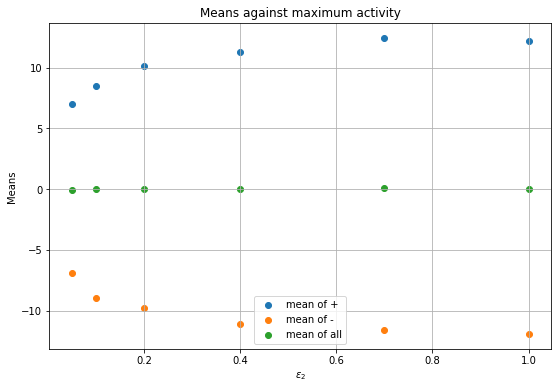

In [6]:
### Calculating mean of distributions

#means[i][files_2] is the mean of the files_2 means
means = np.zeros((files,files_2+1))

for i in range (files):
    for j in range (files_2):
        means[i][j] = np.mean( g[f"data_{files_2*i+1+j}_op_1"][N-1] )

# Calculating averaged mean
for i in range(files):
    for j in range (files_2):
        means[i][files_2] += means[i][j]
    means[i][files_2] = means[i][files_2]/files_2

# Calculating means of each peak
# Splitting each array into positive and negative values
for i in range(files * files_2):
    g[f"data_{i+1}_op_1_pos"] = []
    g[f"data_{i+1}_op_1_neg"] = []
    for j in range (len( g[f"data_{i+1}_op_1"][N-1] )):
        op = g[f"data_{i+1}_op_1"][N-1][j]
        if op > 0:
            g[f"data_{i+1}_op_1_pos"].append( op )
        else:
            g[f"data_{i+1}_op_1_neg"].append( op )

means_peaks = np.zeros((files,files_2+1,2))

# Calculating (average) peak means
for i in range (files):
    for k in range (2):
        if k == 0:
            for j in range (files_2):
                means_peaks[i][j][k] += np.mean( g[f"data_{5*i+1+j}_op_1_pos"])
        else:
            for j in range (files_2):
                means_peaks[i][j][k] += np.mean( g[f"data_{5*i+1+j}_op_1_neg"])
    for j in range (files_2):
        means_peaks[i][files_2][0] += means_peaks[i][j][0]
        means_peaks[i][files_2][1] += means_peaks[i][j][1]
    means_peaks[i][files_2][0] += means_peaks[i][5][0] / files_2
    means_peaks[i][files_2][1] += means_peaks[i][5][1] / files_2

plt.figure(figsize=(9,6))
plt.scatter(eps2, means_peaks[:,files_2,0], label="mean of +")
plt.scatter(eps2, means_peaks[:,files_2,1], label="mean of -")
plt.scatter(eps2, means[:,files_2], label="mean of all")
plt.xlabel(f"$\epsilon_2$")
plt.ylabel("Means")
plt.title("Means against maximum activity")
plt.legend()
plt.grid()
plt.show()

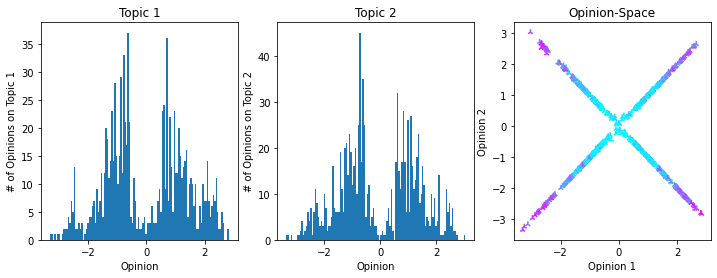

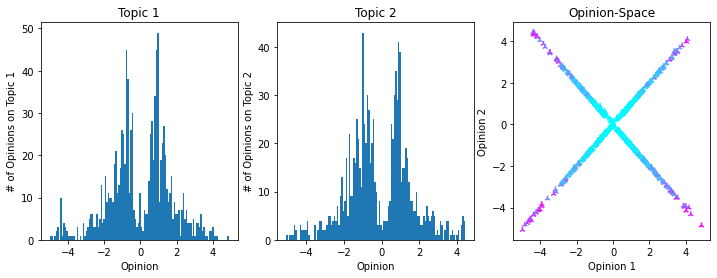

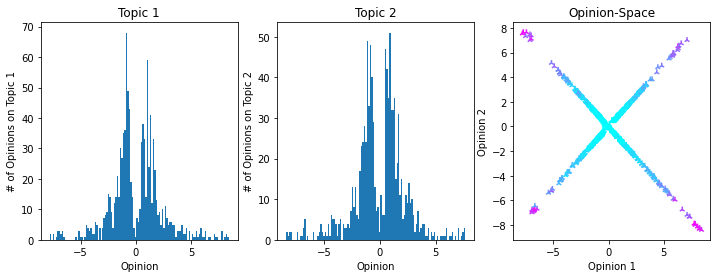

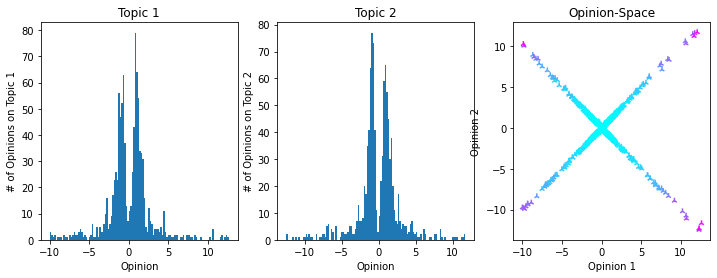

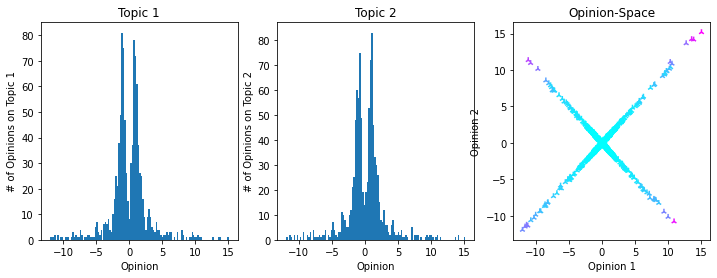

In [7]:
def Plot_Opinion_Distribution_2d(data1, data2, data_act):
    op1_list = data1
    op2_list = data2
    op1_counts = Counter(op1_list)
    op2_counts = Counter(op2_list)

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].set_title("Topic 1")
    ax[0].set_xlabel("Opinion")
    ax[0].set_ylabel("# of Opinions on Topic 1")
    ax[0].hist(op1_list, bins=120)
    ax[1].set_title("Topic 2")
    ax[1].set_xlabel("Opinion")
    ax[1].set_ylabel("# of Opinions on Topic 2")
    ax[1].hist(op2_list, bins=120)
    ax[2].set_title("Opinion-Space")
    ax[2].set_xlabel("Opinion 1")
    ax[2].set_ylabel("Opinion 2")
    ax[2].scatter(op1_list, op2_list, c=data_act, cmap='cool', marker = '2')
    plt.show()

Plot_Opinion_Distribution_2d(data5[len(data5)-2], data5[len(data5)-1], data5[0])
Plot_Opinion_Distribution_2d(data10[len(data10)-2], data10[len(data10)-1], data10[0])
Plot_Opinion_Distribution_2d(data15[len(data15)-2], data15[len(data15)-1], data15[0])
Plot_Opinion_Distribution_2d(data20[len(data20)-2], data20[len(data20)-1], data20[0])
Plot_Opinion_Distribution_2d(data25[len(data25)-2], data25[len(data25)-1], data25[0])